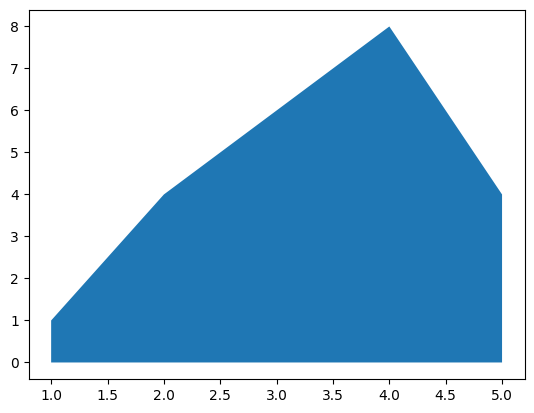

In [ ]:
import matplotlib.pyplot as plt
# Create data
x = [1, 2, 3, 4, 5]
y = [1, 4, 6, 8, 4]

# Area plot
plt.fill_between(x, y)
plt.show()


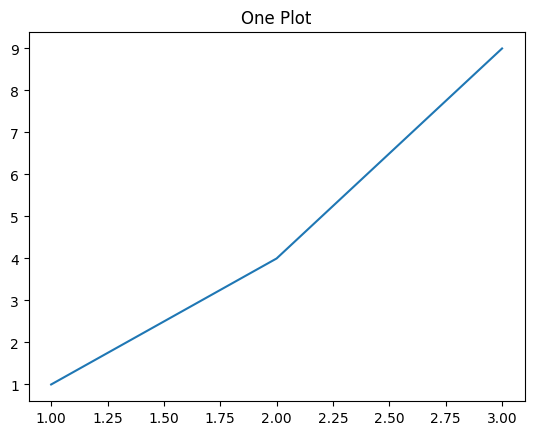

In [3]:
import matplotlib.pyplot as plt

# Create Figure and Axes
fig, ax = plt.subplots()

# Plot on the Axes
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_title("One Plot")

plt.show()

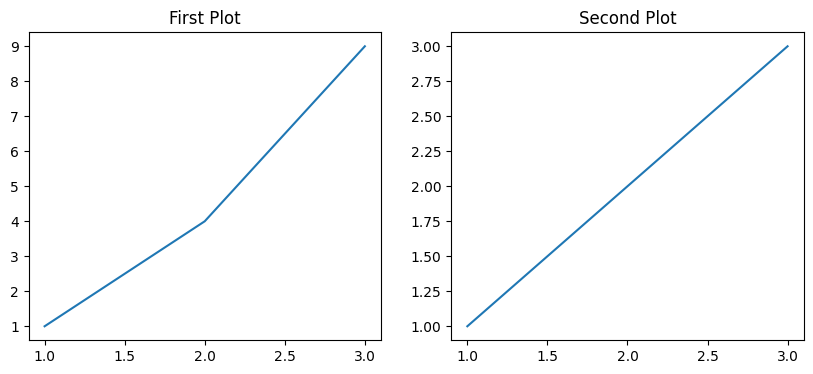

In [2]:
import matplotlib.pyplot as plt

# Create Figure with 2 Axes (2 plots side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot on first Axes
ax1.plot([1, 2, 3], [1, 4, 9])
ax1.set_title("First Plot")

# Plot on second Axes
ax2.plot([1, 2, 3], [1, 2, 3])
ax2.set_title("Second Plot")

plt.show()

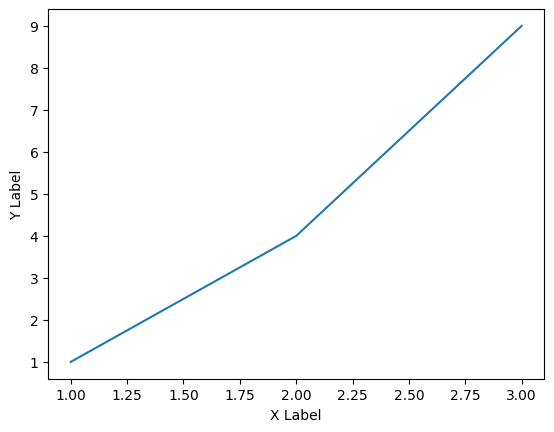

In [4]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])

# Get the x-axis and y-axis objects
x_axis = ax.xaxis  # This is an Axis object
y_axis = ax.yaxis  # This is also an Axis object

# Customize individual axis
x_axis.set_label_text("X Label")
y_axis.set_label_text("Y Label")

plt.show()

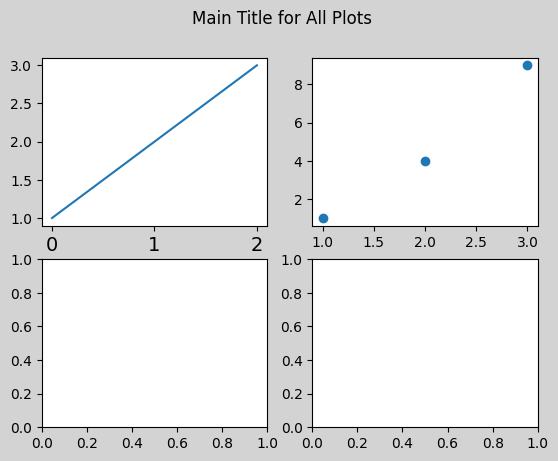

In [5]:
fig, axes = plt.subplots(2, 2)  # 2x2 grid of plots

# Control the entire Figure
fig.suptitle("Main Title for All Plots")
fig.set_facecolor('lightgray')

# Control individual Axes
axes[0, 0].plot([1, 2, 3])
axes[0, 1].scatter([1, 2, 3], [1, 4, 9])

# Control individual Axis
axes[0, 0].xaxis.set_tick_params(labelsize=14)

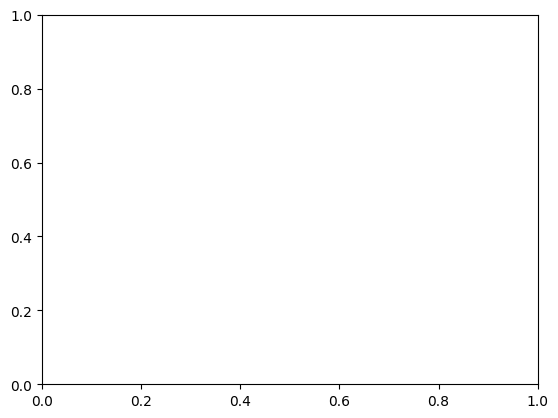

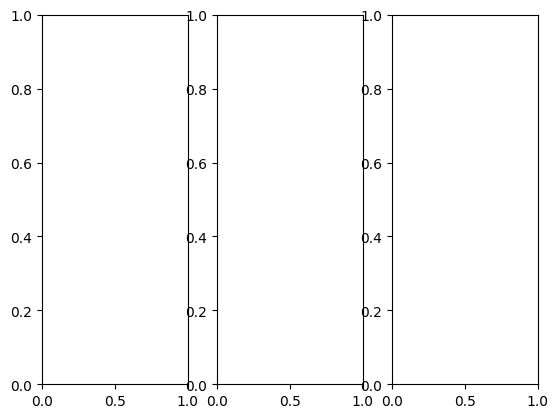

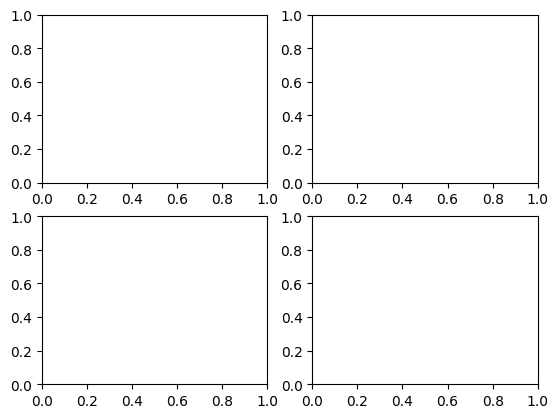

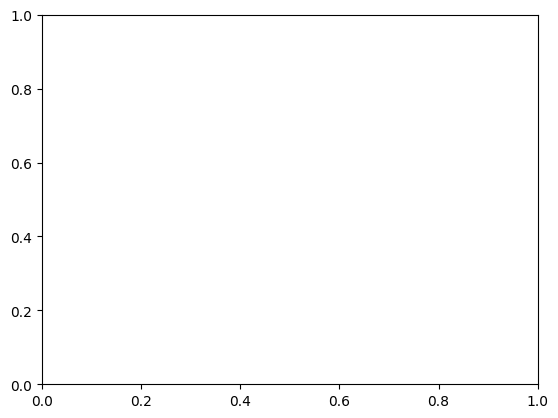

In [6]:
# Pattern 1: Single plot
fig, ax = plt.subplots()

# Pattern 2: Multiple (3) plots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Pattern 3: Grid of plots
fig, axes = plt.subplots(2, 2)
# axes is now a 2D array: axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# Pattern 4: Just need the Figure
fig = plt.figure()
ax = fig.add_subplot(111)  # Older style, less common now

### Undersatnding Artist

#### Visualizing the Artist Tree
```
    Figure (Artist - Container)
    ├── Axes (Artist - Container)
    │   ├── Line2D (Artist - Primitive) ← your actual line plot
    │   ├── Text (Artist - Primitive) ← title
    │   ├── Text (Artist - Primitive) ← xlabel
    │   ├── Text (Artist - Primitive) ← ylabel
    │   ├── XAxis (Artist - Container)
    │   │   ├── Text (Artist - Primitive) ← tick labels
    │   │   ├── Line2D (Artist - Primitive) ← tick marks
    │   │   └── Text (Artist - Primitive) ← axis label
    │   ├── YAxis (Artist - Container)
    │   │   ├── Text (Artist - Primitive) ← tick labels
    │   │   └── Line2D (Artist - Primitive) ← tick marks
    │   ├── Patch (Artist - Primitive) ← background
    │   └── Spine objects (Line2D) ← the box around plot
    ├── Text (Artist - Primitive) ← figure title (suptitle)
    └── Legend (Artist - Container) ← if present
        ├── Patch (Artist - Primitive) ← legend box
        └── Text (Artist - Primitive) ← legend labels
```

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.text.Text'>


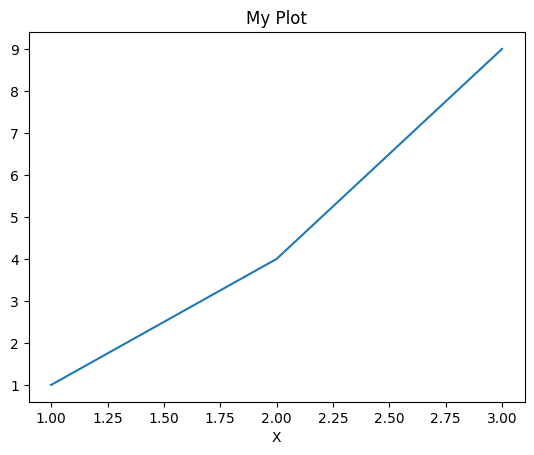

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line = ax.plot([1, 2, 3], [1, 4, 9])  # Returns a Line2D Artist
title = ax.set_title("My Plot")        # Returns a Text Artist
xlabel = ax.set_xlabel("X")            # Returns a Text Artist

# Everything is an Artist!
print(type(fig))      # <class 'matplotlib.figure.Figure'>
print(type(ax))       # <class 'matplotlib.axes._axes.Axes'>
print(type(line[0]))  # <class 'matplotlib.lines.Line2D'>
print(type(title))    # <class 'matplotlib.text.Text'>



All children Artists:
Line2D
Spine
Spine
Spine
Spine
XAxis
YAxis
Text
Text
Text
Legend
Rectangle


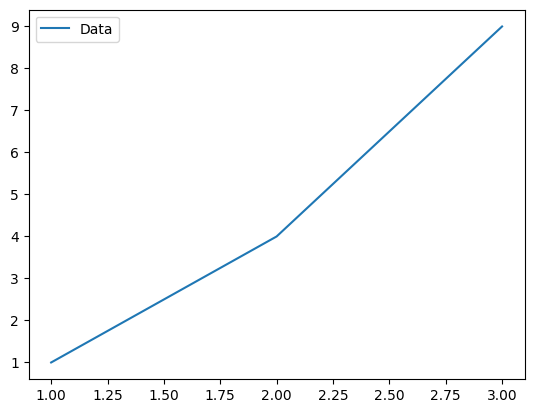

In [8]:
# Accessing Artists
fig, ax = plt.subplots()
line, = ax.plot([1, 2, 3], [1, 4, 9], label='Data')
ax.legend()

# Get all Artists in the Axes
print("All children Artists:")
for artist in ax.get_children():
    print(type(artist).__name__)

# Output shows: Line2D, Text, XAxis, YAxis, Spines, Patch, etc.

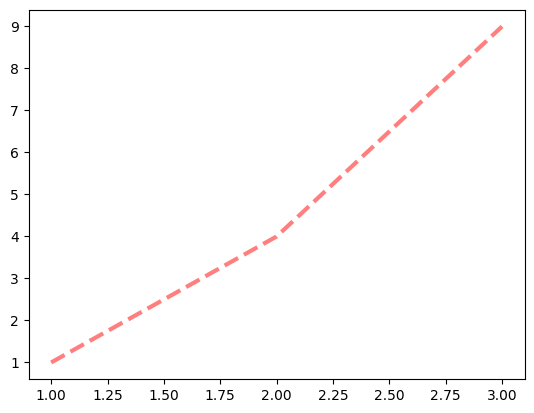

In [9]:
# Modifying Artist directly

fig, ax = plt.subplots()
line, = ax.plot([1, 2, 3], [1, 4, 9])

# The line is an Artist - you can modify it directly
line.set_linewidth(3)
line.set_color('red')
line.set_linestyle('--')
line.set_alpha(0.5)

plt.show()

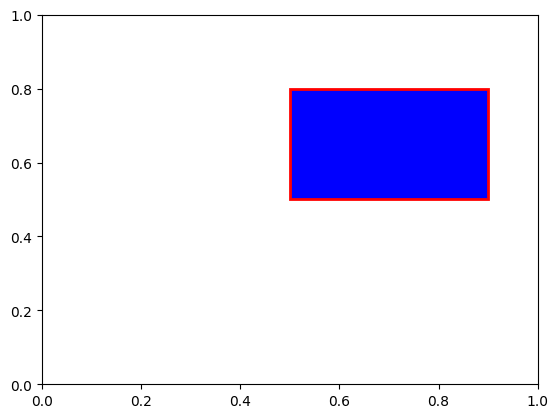

In [ ]:
# Craete the artist manually

#fig, ax = plt.subplots()
#line = plt.Line2D([1, 2, 3], [1, 4, 9], linewidth=3, color='red', linestyle='--', alpha=0.5)
#ax.add_artist(line)
#plt.show()

import matplotlib.patches as mpatches

fig, ax = plt.subplots()

# Create a Rectangle Artist manually
rect = mpatches.Rectangle((0.5, 0.5), 0.4, 0.3, 
                          facecolor='blue', 
                          edgecolor='red',
                          linewidth=2)
line = mpatches.Line2D([1, 2, 3], [1, 4, 9], linewidth=3, color='red', linestyle='--', alpha=0.5)                          

# Add the Artist to the Axes
ax.add_patch(rect)
ax.add_patch(line)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()